# Projects

This notebook contains descriptions of a number of projects designed to allow you to practice what you've learned on real problems. For each project, the skill it practices will be noted. Feel free to pick them in any order based on your interest and the skills you want to practice.

## Simultaneous Equations

Skills:
* Manipulating arrays
* Array operations

Difficulty: Easy

It's possible to reformulate linear simultaneous equations into a matrix equation. For instance, the equations:

$ x - y = 3\\
2x + 5y = 10
$

can be reformulated to the matrix equation:

$\begin{pmatrix}
1 & -1 \\ 
2 & 5
\end{pmatrix}
\begin{pmatrix}
x\\ 
y
\end{pmatrix}
=\begin{pmatrix}
3\\ 
10
\end{pmatrix}$

Either by finding the inverse of the matrix on the left or using a solver, it is possible to solve for the vector $\begin{pmatrix}x\\y\end{pmatrix}$ and thus find the values of $x$ and $y$.

For the equations below, construct the relevant matrix and solve for $x$, $y$ and $z$.

$ x + 3y - z = 0\\
4x + 2y + 3z = 10\\
-5y + z = 4
$

In [1]:
import numpy as np

M = np.array([[1,3,-1],[4,2,3],[0,-5,1]])
b = np.array([0,10,4])

x = np.linalg.solve(M,b)
print(x)

[ 2.56 -0.72  0.4 ]


In [2]:
#@title
import numpy as np

# Create the matrix
m = np.zeros(9).reshape(3,3)
m[0,0] = 1
m[0,1] = 3
m[0,2] = -1
m[1,0] = 4
m[1,1] = 2
m[1,2] = 3
m[2,1] = -5
m[2,2] = 1

# Create the vector on the right-hand side
rhs = np.array([0, 10, 4])

# Two choices of how to solve it

# 1) Calcualte the inverse of the matrix and apply it to the rhs vector
inverse = np.linalg.inv(m)
#Multiply the rhs with the inverse
result = np.matmul(inverse, rhs)
print("Solution 1 result: ", result)

# 2) Solve the matrix equation directly
result = np.linalg.solve(m, rhs)
print("Solution 2 result: ", result)

# Both mehtods return x=2.56, y=0.72, z=0.4

Solution 1 result:  [ 2.56 -0.72  0.4 ]
Solution 2 result:  [ 2.56 -0.72  0.4 ]


## Binomial Probabilities

Skills:
* Built-in functions
* Statistical functions

Difficulty: Easy

The Binomial probability distribution gives the probability $P(p,n,k)$ of getting $k$ results with a probability $p$ of happening from $n$ uncorrelated events. The equation to describe this probability is:

$P(p,n,k) = \begin{pmatrix}n\\ k\end{pmatrix}p^{k}(1-p)^{n-k}$

where

$\begin{pmatrix}n\\ k\end{pmatrix} = \frac{n!}{k!(n-k)!}$

is the Binomial coefficient. There is a function in ```scipy.special``` named ```comb``` (you may want to refer to the ```scipy``` documentation to find the information on this function) which calculates this value. Use this function to write a function of your own which calculates a value of Binomial probability distribution as a function of $n$ and $k$ . Then, use this formula to calculate:

* the probability of rolling sixteen 6s when rolling a fair 6-sided die 100 times.
* the probability of rolling 10 or fewer 6s on a fair 6-sided die

### Extension
Find an use the function relating to the Binomial distribution in the ```scipy.stats``` module (hint: it's a discrete distribution). Read the documentation and use it replicate the values you calculated above.

In [6]:
from scipy.special import comb
from scipy.stats import binom

def binomial_pmf(p,n,k):
    return comb(n,k)*p**k*(1-p)**(n-k)

p_1 = binomial_pmf(1/6,100,16)
print(p_1)
p_2 = sum([binomial_pmf(1/6,100,i) for i in range(11)])
print(p_2)
p_1_a = binom.pmf(16,100,1/6)
print(p_1_a)
p_2_a = binom.cdf(10,100,1/6)
print(p_2_a)

0.10650142398950663
0.042695684147024654
0.1065014239895066
0.04269568414702467


In [4]:
#@title

#Import comb from scipy.special
from scipy.special import comb
# Immport binom for the extension exercise
from scipy.stats import binom
import numpy as np

# Define the function to calculate the Binomial probability
def binomial(p, n,k):
  return(comb(n,k) * p ** k * (1-p) ** (n-k))

#Use the formula to calculate the probability of 16 sixes
print("Probability of sixteen 6s: ", binomial(1/6, 100, 16))

#There are two methods to calcualte the probability of 10 or fewer values

# Sum up the probabilities one by one.
prob_10 = 0
for k in range(0, 11):
  prob_10 = prob_10 + binomial(1/6, 100, k)
print("Probability of ten or fewer 6s: ", prob_10)

# Create an array for the different values of k and pass this to k in the binomial function
# The operations in binomial will be applied element-wise to the elements of the array 
# The returned value will be an array of the corresponding probabilities
# We can them sum this array to get the sum of the probabilities
print("Probability of ten or fewer 6s (alternative method): ", sum(binomial(1/6, 100, np.arange(0,11))))

# Extension exercise

# Use the probability mass function to find the probability of exactly sixteen 6s
print("Probability to sixteen 6s (stats.binom): ", binom.pmf(16, 100, 1/6))
# Use the cumulative density function to find the probability of ten or fewer 6s.
print("Probability of ten or fewer 6s (stats.binom): ", binom.cdf(10, 100, 1/6))

Probability of sixteen 6s:  0.10650142398950663
Probability of ten or fewer 6s:  0.042695684147024654
Probability of ten or fewer 6s (alternative method):  0.042695684147024654
Probability to sixteen 6s (stats.binom):  0.1065014239895066
Probability of ten or fewer 6s (stats.binom):  0.04269568414702467


## Speed Cameras

Skills:
*   Calculus

Difficulty: Easy

A speed camera is found on a road with a speed limit of 30mph. It is set to take a picture if it detects a car traveling faster than this speed. The speed of the cars on the road has a probability distribution function given by a Normal distribution with a mean of 25mph and a standard deviation of 4mph. The equation for the Normal distribution is:

$P(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp{\left(-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right)}$

Use the ```scipy.integrate.quad``` function to calculate the fraction of the cars on the road which will trigger the camera.

### Extension

Use the ```scipy.stats.norm``` function instead of writing your own function for the PDF of the speed of the cars. You will need to read the documentation for the function.

(0.10564977366685203, 4.277965884356302e-09)
0.10564977366685535


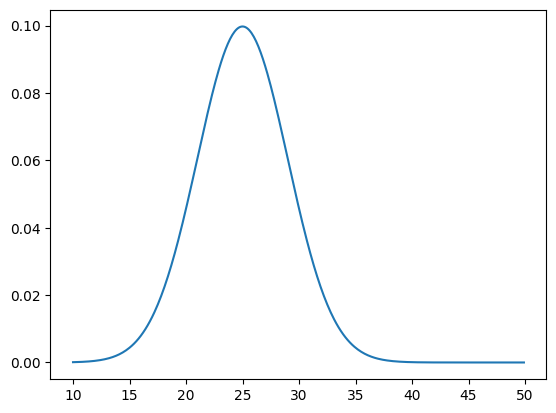

In [15]:
from scipy.integrate import quad
from numpy import sqrt, pi, e, inf

def function(x, mu, sigma):
    return (1/(sigma*sqrt(2*pi)))*e**(-0.5*((x-mu)/sigma)**2)

p = quad(function, 30, inf, args=(25, 4))
print(p)


from scipy.stats import norm
p_a = 1-norm.cdf(30, 25, 4)
print(p_a)


# Below here are the commands to plot a figure of the pdf
# You don't need to and shouldn't edit them
import matplotlib.pyplot as plt
x = np.arange(10, 50, 0.1)
y = function(x, 25, 4)
plt.plot(x,y)

(0.10564977366685525, 1.2833108101591796e-12)
(0.10564977366685525, 1.2833108101591796e-12)


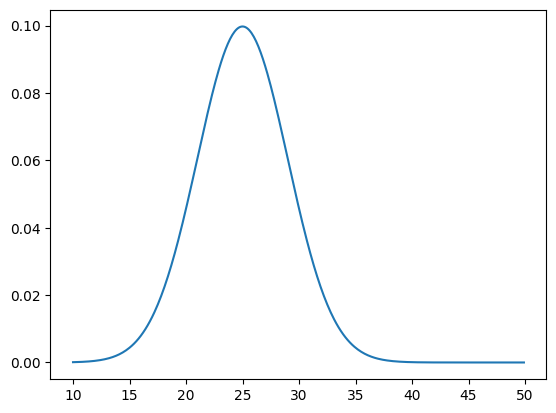

In [18]:
#@title

import numpy as np
import math
from scipy.integrate import quad

#Define the PDF to calcualte the speed
def speed_pdf(speed, mean, sd):
  return(np.exp(-0.5*((speed - mean)/sd) ** 2) /(sd * math.sqrt(2 * math.pi)))

# Integrate it from 30
# The upper limit is technically infinite
# But selecting a large enough upper limit will produce the same result
print(quad(speed_pdf, 30, 100, args=(25, 4))) # Approximately 10.5% of cars activate the camera

# Extension using scipy.stats.norm
# Import the norm pdf
from scipy.stats import norm
# Freese the PDF
speed_pdf_scipy = norm(loc = 25, scale = 4)
# Integrate the PDF
print(quad(speed_pdf_scipy.pdf, 30, 100))

# Below here are the commands to plot a figure of the pdf
# You don't need to and shouldn't edit them
import matplotlib.pyplot as plt
x = np.arange(10, 50, 0.1)
y = norm.pdf(x, 25, 4)
plt.plot(x,y)

## Trajectories

Skills:
*   Initial Value Problems

Difficulty: Medium

A cannonball with a mass of 20kg is launched at an angle of $45^{o}$ at a speed of 100m/s from the location $(0,0)$. We may describe its speed and location as follows, assuming  a quadratic air resistance as follows:

$\frac{\textrm{d}x}{\textrm{d}t} = u\\
\frac{\textrm{d}y}{\textrm{d}t} = v\\
\frac{\textrm{d}u}{\textrm{d}t} = \frac{-\alpha u \sqrt{u^{2} + v ^{2}}}{m}\\
\frac{\textrm{d}v}{\textrm{d}t} = \frac{-\alpha v \sqrt{u^{2} + v ^{2}}}{m}-g$

where $x$ and $y$ are the horizontal and vertical position of the cannonball respectively, $u$ and $v$ are the horizontal and vertical components of the velocity of the cannonball respectively, $\alpha$ is a constant and has a value of 0.1/m, $m$ is the mass of the cannonball and $g$ is the acceleration due to gravity (9.81m/s).

Use these equations to set up an initial value problem using ```odeint``` (or a similar SciPy function if you prefer) in the code cell below. Code has already been provided to plot $y(x)$. How far along the $x$-axis is the cannonball when it hits the ground ($y$=0)?

Hint: The cannonball should hit the ground just before $t$=10s.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


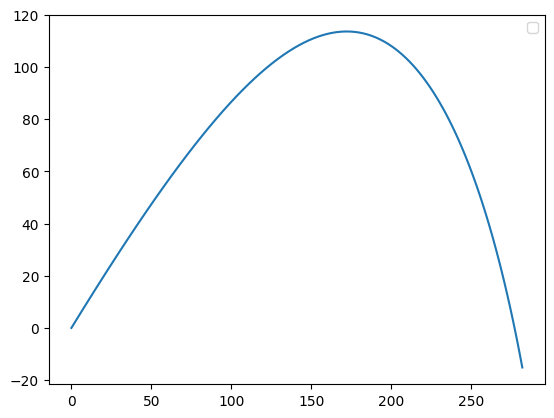

In [19]:
import numpy as np
from scipy.integrate import odeint

def derivative(vec, t, alpha, m, g):
  result = np.zeros(4)

  result[0] = vec[2]
  result[1] = vec[3]
  result[2] = (-alpha*vec[2]*np.sqrt(vec[2]**2+vec[3]**2))/m
  result[3] = (-alpha*vec[3]*np.sqrt(vec[2]**2+vec[3]**2))/m-g

  return(result)

t = np.arange(0, 10, 0.1)

initial_value = np.array([0,0,100*np.pi/4,100*np.pi/4])
alpha, m, g = 0.1, 20, 9.81

time_series = odeint(derivative, initial_value, t, args = (alpha, m, g))


# Below here are the commands to plot the output figure
# You don't need to and shouldn't edit them
# Expects time_series to have the [x,y,u,v] in the first time dimension and t in the second dimension
import matplotlib.pyplot as plt
plt.plot(time_series[:,0], time_series[:,1])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 0.00000000e+00  0.00000000e+00  7.07106781e+01  7.07106781e+01]
 [ 6.90035511e+00  6.85209045e+00  6.73547855e+01  6.63970368e+01]
 [ 1.34817880e+01  1.32916330e+01  6.43241414e+01  6.24505296e+01]
 [ 1.97745455e+01  1.93527537e+01  6.15746129e+01  5.88210276e+01]
 [ 2.58048577e+01  2.50650154e+01  5.90696961e+01  5.54670563e+01]
 [ 3.15956179e+01  3.04541895e+01  5.67789337e+01  5.23540018e+01]
 [ 3.71669248e+01  3.55428708e+01  5.46767113e+01  4.94527452e+01]
 [ 4.25365181e+01  4.03509721e+01  5.27413304e+01  4.67386119e+01]
 [ 4.77201326e+01  4.48961258e+01  5.09542852e+01  4.41905517e+01]
 [ 5.27317880e+01  4.91940132e+01  4.92996944e+01  4.17904951e+01]
 [ 5.75840278e+01  5.32586360e+01  4.77638502e+01  3.95228419e+01]
 [ 6.22881180e+01  5.71025418e+01  4.63348566e+01  3.73740516e+01]
 [ 6.68542134e+01  6.07370131e+01  4.50023375e+01  3.53323129e+01]
 [ 7.12914970e+01  6.41722263e+01  4.37571994e+01  3.33872751e+01]
 [ 7.56082981e+01  6.74173866e+01  4.25914368e+01  3.15298280e

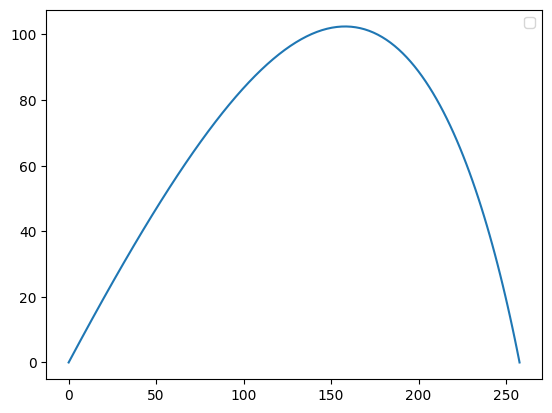

In [20]:
#@title
import numpy as np
import math
from scipy.integrate import odeint

# Define the function which returns the derivative [i.e. dx/dt, dy/dt, du/dt, dv/dt]
# At accepts alpha and mass as arguments as these may change between different cases
def derivative(vec, t, alpha, mass):
  # Set up the array to hold the derivatives
  result = np.zeros(4)

  # This if statement stops the cannonball once it hits the floor
  if vec[1] >= 0:
    # Calculate the rate of change of x and y
    result[0] = vec[2]
    result[1] = vec[3]

    #Calculate the speed of the projectile as we'll use this multiple times
    speed = math.sqrt(vec[2] ** 2 + vec[3] ** 2)

    # Calcualte the rate of change of the speed of the projectile
    result[2] = -alpha * vec[2] * speed / mass
    result[3] = -alpha * vec[3] * speed / mass -9.81 

  # Return the derivative
  return(result)

# Calcualte the initial value of the state of the system
initial_value = np.array([0, 0, 100 * math.cos(math.pi / 4), 100 * math.sin(math.pi / 4)])

# Set the values of alpha and mass
alpha = 0.1
mass = 20

# Create the times at which we want to know [x,y,u,v]
t=np.arange(0, 10, 0.1)

# Find the values of [x,y,u,v] as a function of time
time_series = odeint(derivative, initial_value, t, args = (alpha, mass))

# Print the time series to get an accurate measure of y(x)
# We find y=0 when x=258m so this is when the cannonball hits the ground
print(time_series)

# Below here are the commands to plot the output figure
# You don't need to and shouldn't edit them
# Expects time_series to have the [x,y,u,v] in the first time dimension and t in the second dimension
import matplotlib.pyplot as plt
plt.plot(time_series[:,0], time_series[:,1])
plt.legend()

## Thermal Diffusion

Skills:
*   Array operations
*   Initial Value Problems

Difficulty: Hard

The one-dimensional time-dependent thermal diffusion equation (or heat equation) may be written as follows:

$\frac{\partial T(x,t)}{\partial t} = \alpha \frac{\partial ^{2} T(x,t)}{\partial x^{2}} + H(x,t)$

where $T(t,x)$ is the temperature of the region being solved for, $t$ is time, $x$ is the distance coordinate, $\alpha$ is a constant and $H(x,t)$ is a function which describes the rate of change of temperature due to heating as a function of time and location..

We want to find the temperature distribution as a function of time along a metal rod with a length of 1m. Both ends (at $x$=0m and $x$=1m) are held at a constant temperature of 300K. The rod has an initial temperature of 300K at all values of $x$ and is heated such that $H(x,t)$=1K/s and the physical properties of the rod are such that $\alpha$=Km$^{2}$/s.

We want to know the temperature every centimeter (e.g. $x$=0m, 0.01m, 0.02m ... 0.99m, 1m) along the rod. We can phrase this as an initial value problem, where we describe the state of the system as $\vec{T}(t)$ where the first element of $\vec{T}(t)$ is the temperature at $x=0$m, the next is the temperature at $x=0.01$m and so on until the last (101st) element represents the temperature at $x=1$m.

We can then represent the rate of change of the system as:

$\frac{\textrm{d}\vec{T}(t)}{\textrm{d}t} = M\vec{T}(t) + \vec{H}$

where $M$ is a matrix and $\vec{H}$ is a vector with one entry per position the temperature is being calculated at (i.e. with 101 entries). The term $M\vec{T}(t)$ represents thermal conduction along the rod and $\vec{H}$ represents th heating of the rod.

$M$ is defined as follows:

$M = \begin{pmatrix}
0 & 0 & 0 & 0 & 0 & \dots & 0 & 0 & 0 & 0 & 0\\ 
5 & -10 & 5 & 0 & 0 & \dots & 0 & 0 & 0 & 0 & 0\\ 
0 & 5 & -10 & 5 & 0 & \dots & 0 & 0 & 0 & 0 & 0\\ 
0 & 0 & 5 & -10 & 5 & \dots & 0 & 0 & 0 & 0 & 0\\ 
 &  &  &  &  & \ddots &  &  &  &  & \\ 
0 & 0 & 0 & 0 & 0 & \dots & 5 & -10 & 5 & 0 & 0\\ 
0 & 0 & 0 & 0 & 0 & \dots & 0 & 5 & -10 & 5 & 0\\ 
0 & 0 & 0 & 0 & 0 & \dots & 0 & 0 & 5 & -10 & 5  \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 
\end{pmatrix}$

i.e. The first and last row are all zero. Otherwise, the lead diagonal is all -10 and the adjacent diagonals are all 5.

$H$ is defined such that its first and last values are 0 but it is otherwise 0.1:

$H = \begin{pmatrix}
0 \\
0.1 \\
0.1 \\
\vdots \\
0.1 \\
0.1 \\
0
\end{pmatrix}$

Write a piece of code in the cell below which creates the matrix $M$ and vector $H$ and passes these to ```scipy.integrate.odeint``` as arguments. Define the rest of the initial value problem to solve the differential equation for the values of $\vec{T}(t)$ every second up to $t=1000s$. Your derivative function should use matrix operations.

Code to plot the results as a function of time. To make sure the results are plotted correctly, take care that your array has 1001 entries in the first dimension to represent time and 101 in the second dimension to represent locations along the rod.

In [ ]:









# Below here are the commands to plot the output figure
# You don't need to and shouldn't edit them
# Expects time_series to have the [x,y,u,v] in the first time dimension and t in the second dimension
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 1.001, 0.01)
for i in range(0, 1001, 100):
  plt.plot(x, time_series[i, :], label = "t = "+str(i)+"s")

plt.legend()

In [ ]:
#@title

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the derivative function
# It takes conduction matrix and heating vector as arguments
def derivative(temeprature, t, conduction_matrix, heating):
  # Calcualte MT + H using matmul for the matric multiplication
  # Return the calculated value
  return(np.matmul(conduction_matrix, temeprature) + heating)

# Calcualte the conduction matrix
# This matrix has lots of zeroes, so you could also chose to use the sparse matrix as introduced in the extension of the Array Operations notebook
conduction_matrix = np.zeros(101 * 101).reshape([101, 101])
for i in range(1,100):
  conduction_matrix[i,i] = -10 # The lead diaognal
  conduction_matrix[i, i - 1] = 5 # The diagonal to the left of the lead diagonal
  conduction_matrix[i, i + 1] = 5 # The diagonal to the right of the lead diagonal

# Create the heating vector
heating = np.zeros(101)
heating[1:100] = 0.1

# Calcualte the initial value of the state of the system
initial_value = np.full(101, 300)

# Create the array of output times
t = np.arange(0, 1000.01, 1)

# Calculate the temperature profile as a function of time
time_series = odeint(derivative, initial_value, t, (conduction_matrix, heating))

# Below here are the commands to plot the output figure
# You don't need to and shouldn't edit them
# Expects time_series to have the [x,y,u,v] in the first time dimension and t in the second dimension
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 1.001, 0.01)
for i in range(0, 1001, 100):
  plt.plot(x, time_series[i, :], label = "t = "+str(i)+"s")

plt.legend()